In [1]:
import geopandas as gpd
import os

In [6]:
path = r'T:\DCProjects\Modeling\Sidewalk\ProPrj\ProPrj.gdb'

In [7]:
sidewalks_EUG = gpd.read_file(path, layer='eug_sidewalks')

In [9]:
sidewalks_EUG.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
sidewalks_EUG.head(3)

,Shape_Length,apprden,checked,gis_id,mater,swtype,year_,created_date,created_user,last_edited_date,last_edited_user,geometry
0,150.839423,None,None,NaN,CONC,SB,None,None,None,None,None,"MULTILINESTRING ((4226331.689 893353.069, 4226..."
1,52.640786,None,None,NaN,CONC,SB,None,None,None,None,None,"MULTILINESTRING ((4226455.939 893192.738, 4226..."
2,51.753864,None,None,NaN,CONC,SB,None,None,None,None,None,"MULTILINESTRING ((4226404.210 893194.363, 4226..."


In [15]:
sidewalks_EUG['city'] = 'Eugene'

In [10]:
sidewalks_SPR = gpd.read_file(path, layer='spr_sidewalks')

In [11]:
sidewalks_SPR.crs

<Projected CRS: EPSG:2270>
Name: NAD83 / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
sidewalks_SPR = sidewalks_SPR.to_crs('EPSG:2914')

In [12]:
sidewalks_SPR.head(3)

,Shape_Length,dis,first_side,global_id,last_sidew,objectid_1,shape_leng,geometry
0,31.340759,1,,87b34f1c-b43f-44aa-a60b-fb5c0c9ba631,2,1.0,31.340759,"MULTILINESTRING ((4284684.475 869555.594, 4284..."
1,40.776523,1,,e8f3c5b1-4965-475b-9d53-d5e4969f922a,2,2.0,40.776523,"MULTILINESTRING ((4284653.158 869556.824, 4284..."
2,473.136452,1,,536cacb2-e76b-4abb-8b16-d49af8f04e07,2,3.0,473.136452,"MULTILINESTRING ((4285146.767 869581.037, 4285..."


In [16]:
sidewalks_SPR['city'] = 'Springfield'

In [17]:
sidewalks_EUG_SPR = sidewalks_EUG[['city', 'geometry']].append(sidewalks_SPR[['city', 'geometry']], ignore_index=True)

In [18]:
rtp_path = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources'

In [20]:
sidewalks_COB = gpd.read_file(os.path.join(rtp_path, 'Data', 'Coburg', 'Coburg_sidewalksCOB.shp'))

In [21]:
sidewalks_COB.head(3)

,Id,geometry
0,1606,"LINESTRING (4247692.584 911417.878, 4247677.46..."
1,1609,"LINESTRING (4247397.710 911318.253, 4247543.33..."
2,1767,"LINESTRING (4248497.585 909979.628, 4248995.71..."


In [22]:
sidewalks_COB.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
sidewalks_COB['city'] = 'Coburg'

In [24]:
sidewalks = sidewalks_EUG_SPR.append(sidewalks_COB[['city', 'geometry']])

In [2]:
outpath = r'T:\DCProjects\Modeling\Sidewalk\data\central_Lane_sidewalks.shp'

In [25]:
sidewalks.to_file(outpath)

In [3]:
sidewalks = gpd.read_file(outpath)

<Axes: >

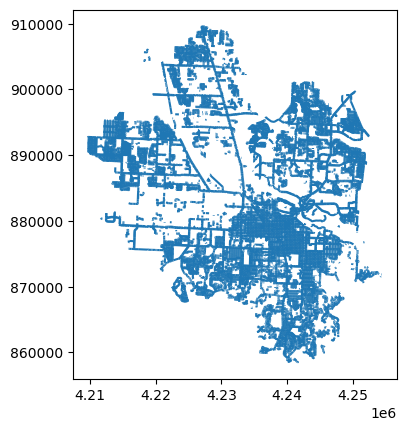

In [6]:
sidewalks[sidewalks.city=='Eugene'].plot()

<Axes: >

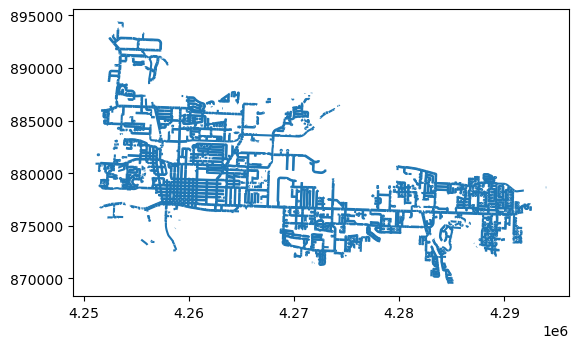

In [7]:
sidewalks[sidewalks.city=='Springfield'].plot()